# TOY PROBLEM -- DECISION TREES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
%matplotlib inline
plt.style.use('seaborn-dark-palette')

In [10]:
!pip install pydotplus

In [2]:
df=pd.read_csv("toy_data.csv")

In [3]:
df # toy data lets have a look

,X1,X2,class
0,5,1,0
1,6,2,0
2,7,3,0
3,8,4,0
4,9,5,0
5,6,3,1
6,1,4,1
7,2,3,1
8,3,2,1
9,4,1,1


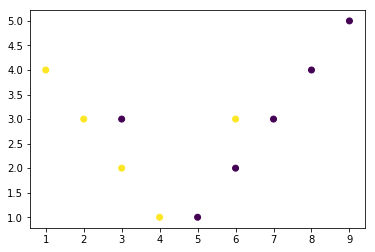

In [4]:
#lets plot it...
plt.scatter(df['X1'],df['X2'],c=df['class'],cmap='viridis')
#0's are blue
#i's are red
#the plot shows that theri are 2 outliers one blue point and one red point

In [5]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [6]:
#lets draw a tree and give depth as only 1..it is clear from the above figure that just one depth 
#will not take care of the putliers... Let check this out
from sklearn import tree
mycols=['X1','X2']

In [14]:
cl_tree=tree.DecisionTreeClassifier(criterion="gini",random_state=1,max_depth=1)
cl_tree=cl_tree.fit(df[['X1','X2']],df['class'])
# the model building is done...
#lets first predict on the data
pred=cl_tree.predict(df[['X1','X2']])
#for the confusion matrix
print(pd.crosstab(df['class'],pred))

#to view the treee
dot_data = StringIO()
export_graphviz(cl_tree, out_file=dot_data, feature_names=mycols, 
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())
graph.write_png('Toy_tree_depth1.png')

col_0  0  1
class      
0      5  1
1      1  4


True

In [16]:
#Above is reety much what we expected.... the outliers are not classified correctly
#lets now increase the depth and checck..
cl_tree2=tree.DecisionTreeClassifier(criterion="gini",random_state=1,max_depth=2) #depth 2
cl_tree2=cl_tree2.fit(df[['X1','X2']],df['class'])
#lets first predict on the data
pred=cl_tree2.predict(df[['X1','X2']])
#for the confusion matrix
print(pd.crosstab(df['class'],pred))
#to view the treee-------------------------------------------
dot_data = StringIO()
export_graphviz(cl_tree2, out_file=dot_data, feature_names=mycols, 
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())
graph.write_png('Toy_tree_depth2.png')

col_0  0  1
class      
0      5  1
1      1  4


True

col_0  0  1
class      
0      6  0
1      0  5


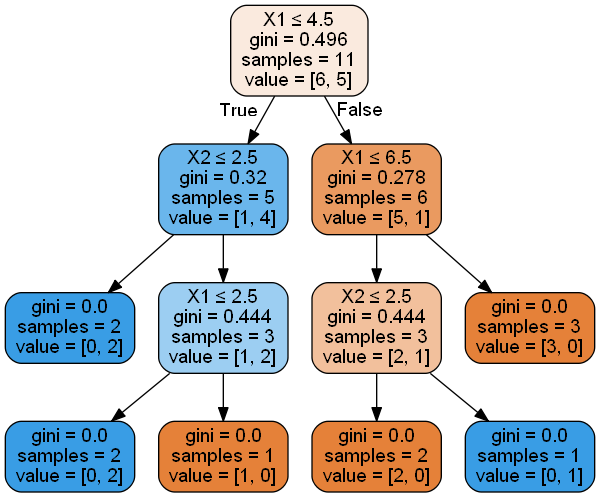

In [17]:
#Above is preety much what we expected.... the outliers are not classified correctly
#lets now increase the depth and checck..
cl_tree3=tree.DecisionTreeClassifier(criterion="gini",random_state=1,max_depth=3) #depth 3
cl_tree3=cl_tree3.fit(df[['X1','X2']],df['class'])
#lets first predict on the data
pred=cl_tree3.predict(df[['X1','X2']])
#for the confusion matrix
print(pd.crosstab(df['class'],pred))
#to view the treee-------------------------------------------
dot_data = StringIO()
export_graphviz(cl_tree3, out_file=dot_data, feature_names=mycols, 
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

Image(graph.create_png())
#graph.write_png('Toy_tree_depth3.png')

In [ ]:
#all classified correctly... This is the Power of Depth.... So use it Judiciously.....